In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [54]:
import tensorflow as tf

# Load the validation dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",  # Use "categorical" for one-hot encoding
    class_names=None,           # Automatically inferred from directory structure
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Get the class names
class_names = validation_set.class_names
print(class_names)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [56]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.h5')

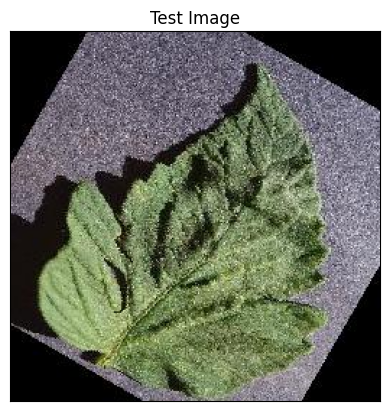

In [58]:
import cv2
import matplotlib.pyplot as plt

# Path to the test image
image_path = 'test/test/TomatoHealthy3.JPG'

# Reading the image in default mode
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Converting BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Displaying the image
    plt.imshow(img)
    plt.title('Test Image')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [60]:
import numpy as np
import tensorflow as tf

# Path to the image
image_path = 'test/test/TomatoHealthy3.JPG'

# Load the image and resize it to the target size
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))

# Convert the image to a numpy array
input_arr = tf.keras.preprocessing.image.img_to_array(image)

# Expand dimensions to create a batch of size 1
input_arr = np.expand_dims(input_arr, axis=0)  # Convert single image to a batch.

# Make predictions
predictions = cnn.predict(input_arr)

# Optionally, print the predictions
print(predictions)

1/1 [==============================] - 0s 77ms/step
[[2.54269753e-06 3.05520553e-10 2.01927114e-10 1.30853039e-06
  5.10308098e-08 9.73907731e-07 8.33931812e-11 1.66297343e-09
  1.95784951e-11 7.34363403e-11 1.26700228e-09 1.50684315e-12
  2.66370009e-10 8.75444075e-12 1.65723095e-11 3.60335858e-11
  1.14548794e-10 1.85028923e-10 1.34699626e-10 1.81472473e-08
  3.61963237e-09 1.12705088e-11 2.74481438e-09 4.76537143e-10
  7.36511352e-10 1.05049502e-07 6.59995503e-10 1.44990964e-09
  2.26082399e-11 2.06131184e-12 3.17762670e-06 5.96432059e-08
  4.00676692e-09 4.84732324e-11 3.08660947e-06 1.26651051e-11
  2.84807282e-11 9.99988675e-01]]


In [62]:
result_index = np.argmax(predictions)  # Return index of the class with the highest predicted probability
print("Predicted class index:", result_index)

Predicted class index: 37


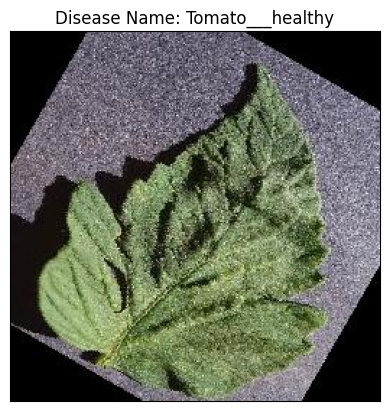

In [64]:
# Displaying the disease prediction
model_prediction = class_names[result_index]  # Ensure class_names is defined
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()